# Análisis Exploratorio de Datos Mall Customer

In [2]:
import pandas as pd

In [3]:
# Dirección del archivo
file_path = r"D:\Python\Proyectos\4. Mall Customer Segmentation Data\Mall_Customers.csv"

In [4]:
# Cargar el archivo CSV
try:
    data = pd.read_csv(file_path)
    print("Datos cargados con éxito.")
    print(data.head())  # Muestra las primeras filas del DataFrame
except FileNotFoundError:
    print("No se encontró el archivo. Verifica la dirección.")
except Exception as e:
    print(f"Ocurrió un error al cargar los datos: {e}")

Datos cargados con éxito.
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
# Segmentar clientes según actividad o gasto
# Segmentación por gasto (spending)
data.rename(columns={'Spending Score (1-100)': 'spending'}, inplace=True)

# Segmentación por gasto (spending)
bins = [0, 50, 150, 300, 500]  # Rango de valores para segmentación
labels = ['Bajo', 'Moderado', 'Alto', 'Premium']  # Etiquetas para cada segmento
data['spending_segment'] = pd.cut(data['spending'], bins=bins, labels=labels)

# Mostrar las primeras filas para verificar
print(data[['CustomerID', 'spending', 'spending_segment']].head())

   CustomerID  spending spending_segment
0           1        39             Bajo
1           2        81         Moderado
2           3         6             Bajo
3           4        77         Moderado
4           5        40             Bajo


In [8]:
# Crear la columna 'status' basada en Spending Score
data['status'] = data['spending'].apply(lambda x: 'Activo' if x > 50 else 'Inactivo')

# Calcular tasas de churn y retención
total_customers = len(data)
active_customers = len(data[data['status'] == 'Activo'])
inactive_customers = len(data[data['status'] == 'Inactivo'])

retention_rate = active_customers / total_customers * 100
churn_rate = inactive_customers / total_customers * 100

print(f"Tasa de retención: {retention_rate:.2f}%")
print(f"Tasa de churn: {churn_rate:.2f}%")

Tasa de retención: 48.50%
Tasa de churn: 51.50%


In [15]:
print(data.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'spending',
       'spending_segment', 'status'],
      dtype='object')


In [16]:
# Comparar las medias y distribuciones entre grupos (Activo e Inactivo)
print(data.groupby('status')[['Age', 'Annual Income (k$)', 'spending']].mean())

# Distribución por género y estado
gender_distribution = data.groupby(['status', 'Gender']).size().unstack()
print(gender_distribution)

                Age  Annual Income (k$)   spending
status                                            
Activo    34.597938           60.412371  71.670103
Inactivo  42.854369           60.699029  29.980583
Gender    Female  Male
status                
Activo        53    44
Inactivo      59    44


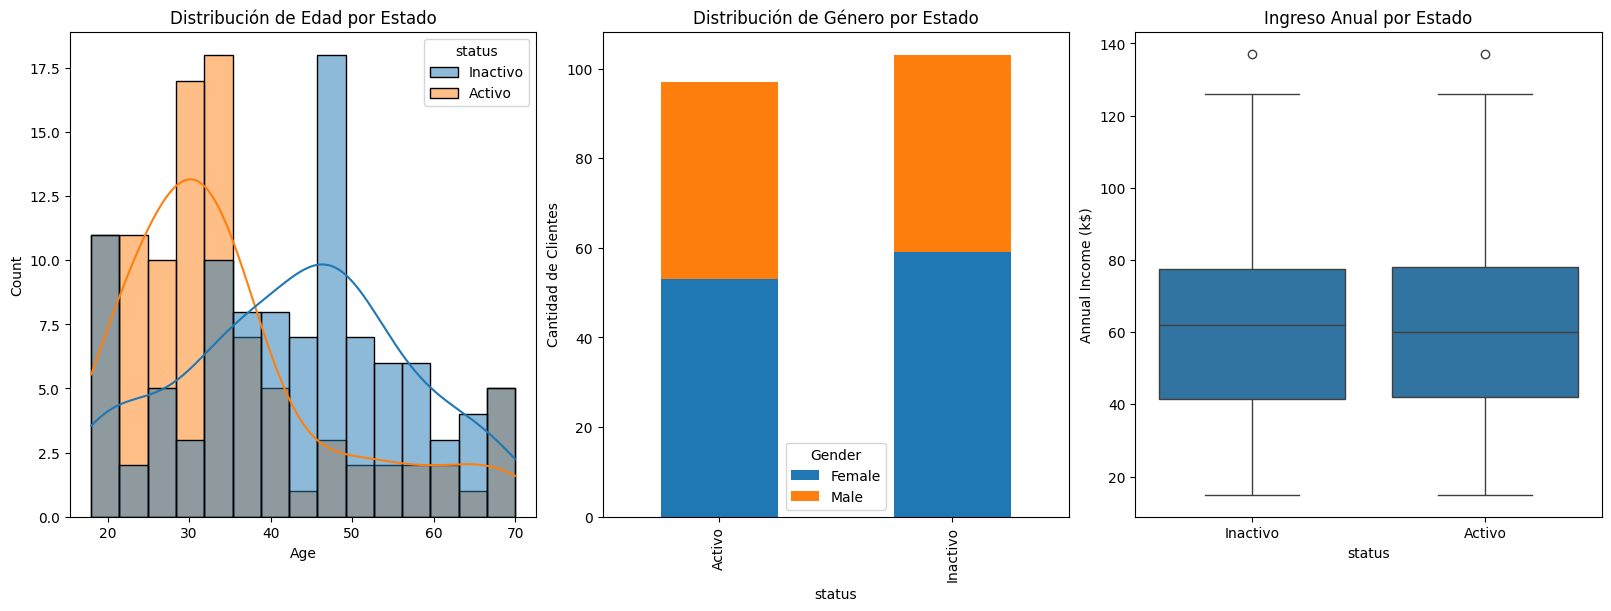

In [25]:
# Calcular la distribución por género y estado
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con 1 fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(16, 6), constrained_layout=True)

# Histograma de edad por estado
sns.histplot(data, x='Age', hue='status', kde=True, bins=15, ax=axes[0])
axes[0].set_title('Distribución de Edad por Estado')

# Gráfica de barras: Género vs Estado
gender_distribution.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Distribución de Género por Estado')
axes[1].set_ylabel('Cantidad de Clientes')

# Boxplot de ingresos anuales por estado
sns.boxplot(data=data, x='status', y='Annual Income (k$)', ax=axes[2])
axes[2].set_title('Ingreso Anual por Estado')

# Mostrar los gráficos
plt.show()


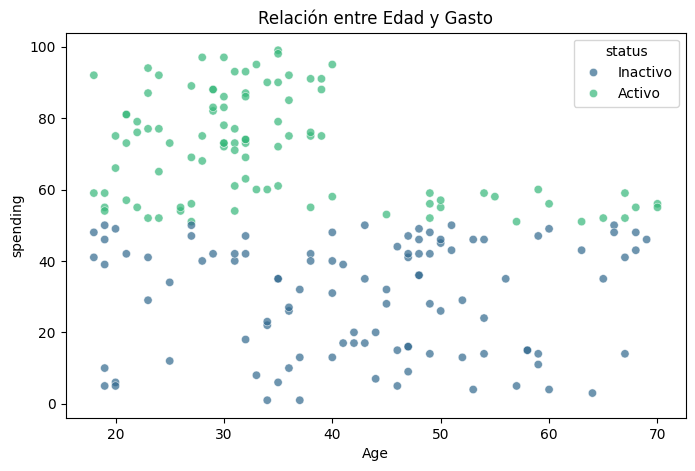

In [26]:
# Scatter plot: Edad vs. Gasto
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Age', y='spending', hue='status', palette='viridis', alpha=0.7)
plt.title('Relación entre Edad y Gasto')
plt.show()

<u>**Relación entre Edad y Gasto (Gráfico 1)**</u>

*- Los clientes activos tienden a tener un gasto más alto, especialmente en las edades jóvenes (20-35 años).*

*- A medida que aumenta la edad, se observa una disminución en el gasto promedio, y más clientes caen en el grupo inactivo.*

*- Hay una notable separación entre los clientes activos e inactivos en términos de gasto, lo que sugiere que la edad podría ser un factor moderado en el comportamiento de gasto.*

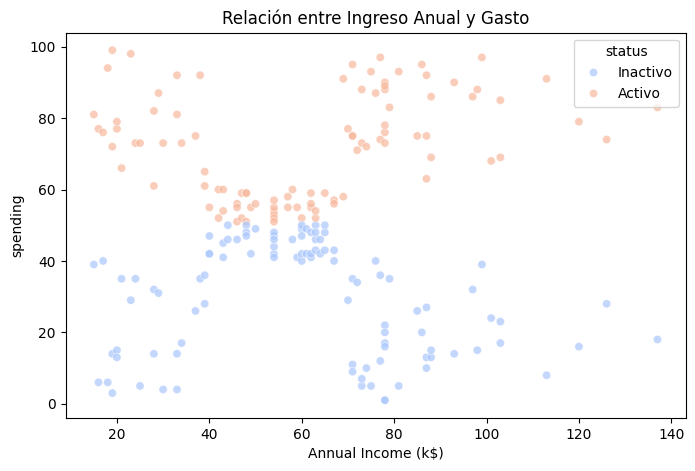

In [27]:
# Scatter plot: Ingreso Anual vs. Gasto
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Annual Income (k$)', y='spending', hue='status', palette='coolwarm', alpha=0.7)
plt.title('Relación entre Ingreso Anual y Gasto')
plt.show()

<u>**Relación entre Ingreso Anual y Gasto**</u>

*- No parece haber una fuerte correlación directa entre el ingreso anual y el nivel de gasto.*

*- Los clientes con ingresos anuales más altos no necesariamente tienen un mayor gasto; algunos con ingresos bajos o moderados están en el segmento activo.*

*- Esto indica que factores distintos al ingreso anual (como estilo de vida, edad o género) podrían influir más en el comportamiento de gasto.*

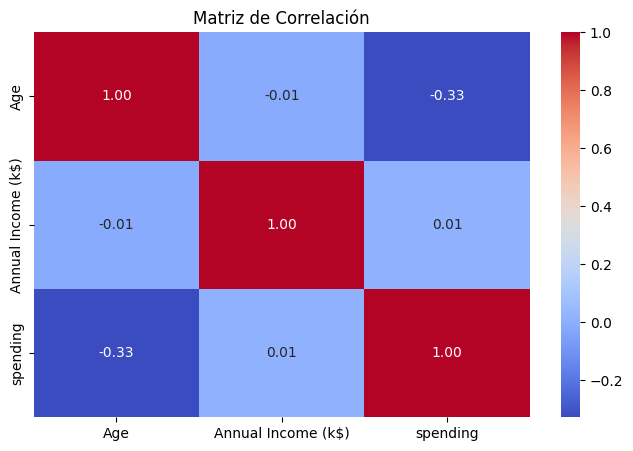

In [28]:
# Matriz de correlación
corr_matrix = data[['Age', 'Annual Income (k$)', 'spending']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

<u>**Matriz de Correlación (Gráfico 3)**</u>

*- La correlación entre "Edad" y "Gasto" es moderadamente negativa (-0.33), lo que confirma que las personas más jóvenes tienden a gastar más.*

*- No hay correlación significativa entre el ingreso anual y el gasto, lo que refuerza las observaciones del gráfico anterior.*

*- Tampoco hay una correlación significativa entre edad e ingreso anual.*

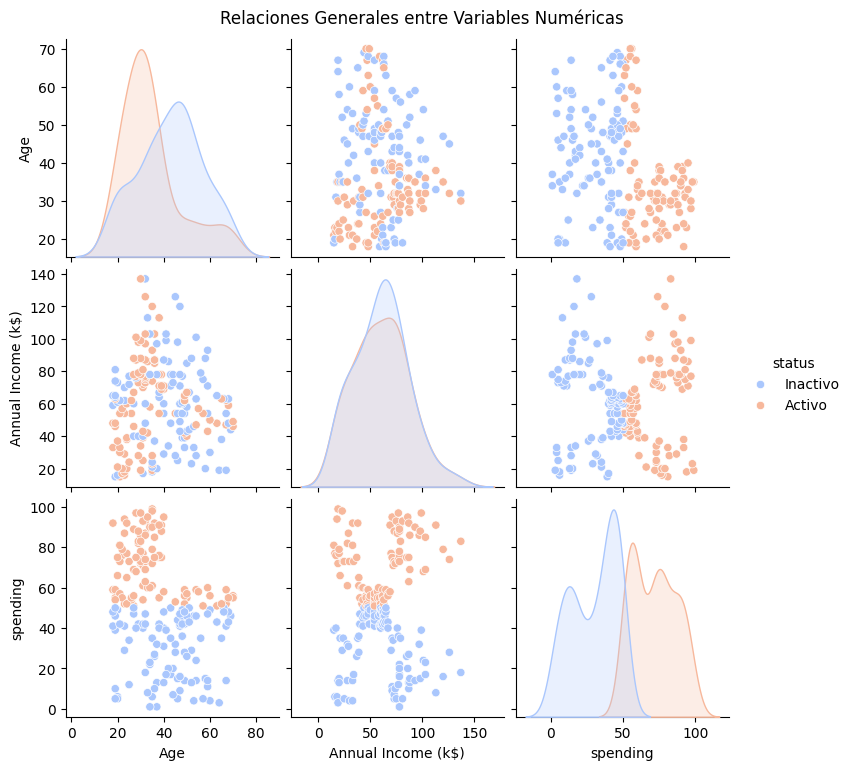

In [31]:
# Pairplot: Relaciones Generales
sns.pairplot(data, vars=['Age', 'Annual Income (k$)', 'spending'], hue='status', palette='coolwarm', diag_kind='kde')
plt.suptitle('Relaciones Generales entre Variables Numéricas', y=1.02)
plt.show()

<u>**Relaciones Generales (Gráfico 4 - Pairplot)**</u>

*- Este gráfico confirma las observaciones anteriores. Las distribuciones muestran que los clientes activos tienen un gasto más alto, pero no necesariamente están concentrados en un nivel de ingreso anual específico.*

*- La distribución de la edad para los clientes activos está más enfocada en los grupos más jóvenes.*

status            Activo  Inactivo
age_group Gender                  
18-25     Female      13         6
          Male         8         7
26-35     Female      25        12
          Male        19         4
36-45     Female       6        15
          Male         7         8
46-55     Female       6        17
          Male         1        13
56-65     Female       1         6
          Male         4         6
66-80     Female       2         2
          Male         3         5


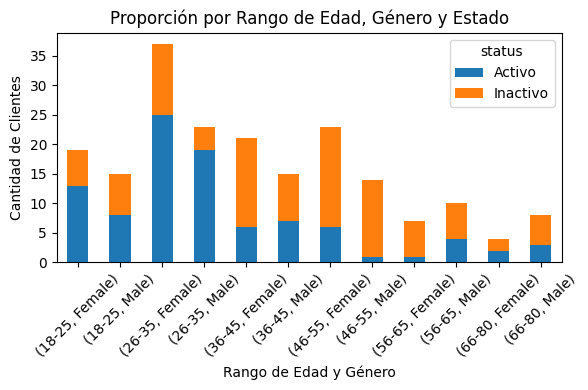

In [38]:
# Segmentación adicional
# Impacto de combinaciones de variables
# Proporción de clientes activos/inactivos por rango de edad y género
# Crear el rango de grupos de edad
age_bins = [18, 25, 35, 45, 55, 65, 80]
data['age_group'] = pd.cut(data['Age'], bins=age_bins, labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-80'])

# Calcular la proporción de clientes por rango de edad, género y estado
pivot_table = data.groupby(['age_group', 'Gender', 'status'], observed=False).size().unstack()

# Mostrar la tabla resultante
print(pivot_table)

# Visualización: gráfico de barras apiladas
pivot_table.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title("Proporción por Rango de Edad, Género y Estado")
plt.ylabel("Cantidad de Clientes")
plt.xlabel("Rango de Edad y Género")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<u>**Segmentación adicional: Proporción por rango de edad, género y estado**</u>

**Análisis:** La segmentación por rangos de edad y género revela diferencias claras en la proporción de clientes activos e inactivos. Por ejemplo:

   *El rango de edad 26-35 tiene una mayor cantidad de clientes activos, especialmente mujeres.*
   
   *A medida que aumenta la edad, los clientes tienden a ser menos activos, lo que puede indicar un patrón relacionado con la edad.*

**Criterio:** Es importante profundizar en el rango 26-35 para identificar qué factores específicos impulsan su actividad. Además, se podría explorar si estos patrones se replican en otros segmentos.

In [33]:
# Análisis de outliers
# Identificar outliers en ingresos anuales
Q1 = data['Annual Income (k$)'].quantile(0.25)
Q3 = data['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Annual Income (k$)'] < lower_bound) | (data['Annual Income (k$)'] > upper_bound)]
print("Clientes con ingresos extremos:")
print(outliers)

Clientes con ingresos extremos:
     CustomerID Gender  Age  Annual Income (k$)  spending spending_segment  \
198         199   Male   32                 137        18             Bajo   
199         200   Male   30                 137        83         Moderado   

       status age_group  
198  Inactivo     26-35  
199    Activo     26-35  


<u>**Análisis de outliers en ingresos anuales**</u>

**Análisis:** Los outliers detectados, como los clientes con ingresos extremadamente altos (137 k$), presentan comportamientos mixtos en términos de actividad:

   *- Algunos son activos (spending alto), mientras que otros son inactivos (spending bajo).*

**Criterio:** Investigar si los outliers están relacionados con otros factores (edad, género, etc.) y analizar si deben tratarse como casos especiales o si pueden incluirse en análisis generales.

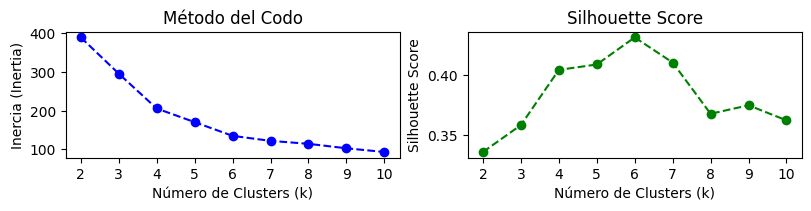

(6, 0.43106526216603014)

In [52]:
# Implementación del método del codo y cálculo del silhouette score

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Método del codo para determinar el número óptimo de clusters
inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Crear una figura con dos gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(8, 2), constrained_layout=True)

# Gráfica del método del codo
axes[0].plot(range(2, 11), inertia, marker='o', linestyle='--', color='blue')
axes[0].set_title('Método del Codo')
axes[0].set_xlabel('Número de Clusters (k)')
axes[0].set_ylabel('Inercia (Inertia)')
axes[0].set_xticks(range(2, 11))

# Gráfica del silhouette score
axes[1].plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='green')
axes[1].set_title('Silhouette Score')
axes[1].set_xlabel('Número de Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(range(2, 11))

# Mostrar los gráficos
plt.show()

# Resultados del silhouette score y método del codo
optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2

optimal_k_silhouette, max(silhouette_scores)

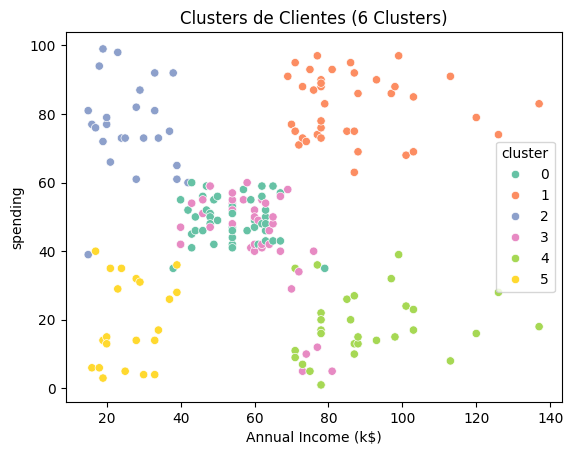

In [ ]:
# Clusterización Segun Metodo del Codo y Silhouette Score
# Implementar K-means para descubrir patrones ocultos
# Seleccionar variables numéricas para clusterización
cluster_data = data[['Age', 'Annual Income (k$)', 'spending']].copy()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Aplicar K-means con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

# Visualizar clusters
sns.scatterplot(data=data, x='Annual Income (k$)', y='spending', hue='cluster', palette='Set2')
plt.title("Clusters de Clientes (6 Clusters)")
plt.show()

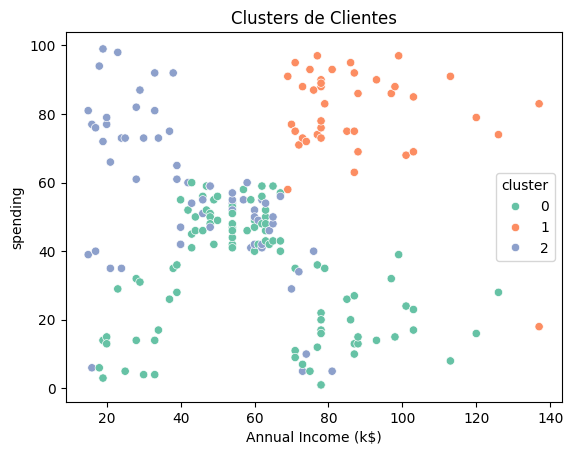

In [ ]:
# Clusterización con 3
# Implementar K-means para descubrir patrones ocultos
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar variables numéricas para clusterización
cluster_data = data[['Age', 'Annual Income (k$)', 'spending']].copy()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Aplicar K-means
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

# Visualizar clusters
sns.scatterplot(data=data, x='Annual Income (k$)', y='spending', hue='cluster', palette='Set2')
plt.title("Clusters de Clientes")
plt.show()

<u>**Clusterización con K-means**</u>

**Análisis:** Los clusters identificados agrupan a los clientes según patrones en Age, Annual Income (k$) y spending. Esto permite diferenciar segmentos como:

     - Clientes con alto ingreso y alto gasto.
     - Clientes con bajo ingreso y bajo gasto.
     - Clientes intermedios en ambas variables.

**Criterio:** Utilizar los resultados de los clusters para crear estrategias de marketing dirigidas y personalizadas. Validar los resultados del K-means con métricas de evaluación como silhouette score para determinar si el número de clusters es adecuado.

Se puede usar 6 clusters si el objetivo es obtener segmentaciones más específicas que puedan revelar patrones únicos en los datos, como en estrategias de marketing personalizadas. Como este es un enfoque más general, los 3 clusters pueden ser más adecuados, y el uso dependera del nivel de detalle que se necesite para el análisis.

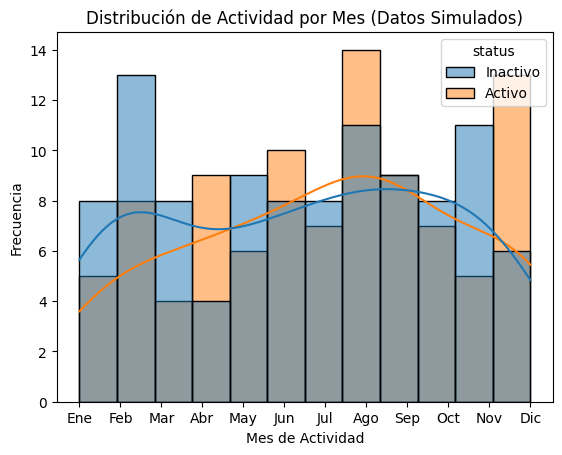

In [41]:
# Análisis temporal (si se dispone de datos)
# Crear una columna 'last_activity' simulada con fechas aleatorias en 2023
import numpy as np
np.random.seed(42)  # Para reproducibilidad
data['last_activity'] = pd.to_datetime(
    np.random.choice(pd.date_range('2023-01-01', '2023-12-31'), size=len(data))
)

# Calcular el mes de actividad
data['activity_month'] = data['last_activity'].dt.month

# Graficar la actividad por mes
sns.histplot(data, x='activity_month', hue='status', kde=True, bins=12)
plt.title("Distribución de Actividad por Mes (Datos Simulados)")
plt.xlabel("Mes de Actividad")
plt.ylabel("Frecuencia")
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                          'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

<u>**Análisis temporal (simulado)**</u>

**Análisis:** Los datos simulados muestran una distribución de actividad constante a lo largo del año, con picos en meses como julio y agosto. Esto puede indicar estacionalidad en la actividad de los clientes.

**Criterio:** Si se tienen datos reales, analizar patrones temporales más detallados y cruzarlos con campañas de marketing u otros eventos que puedan influir en la actividad.

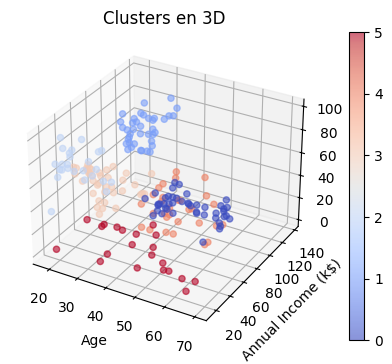

In [58]:
# Visualización 3D de Clusters
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['Age'], data['Annual Income (k$)'], data['spending'], c=data['cluster'], cmap='coolwarm', alpha=0.6)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending')
plt.title("Clusters en 3D")
plt.colorbar(scatter)
plt.show()

In [59]:
# Modelo Predictivo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Preparar datos
X = data[['Age', 'Annual Income (k$)', 'spending']]
y = data['status'].apply(lambda x: 1 if x == 'Activo' else 0)  # 1: Activo, 0: Inactivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluación
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

